# Example 1: The image and probe reconstruction from simulated frames

In [1]:
import sys
import time
from datetime import timedelta, datetime, tzinfo
import argparse
import numpy as np
import h5py
import sharp
import sharpnsls2
import matplotlib.pyplot as plt
# make graphics inline
# %matplotlib inline
%matplotlib notebook

Set the input parameters and initialize containers

In [2]:
t1 = datetime.now();
args = ['local', '-o', '10', '-i', '100', 'e1.cxi']
sharpNSLS2 = sharpnsls2.PythonSharpNSLS2()
sharpNSLS2.init(args)
t2 = datetime.now()

print "initialization time: ", (t2 - t1)

initialization time:  0:00:23.566087


Plot the initial image

<IPython.core.display.Javascript object>


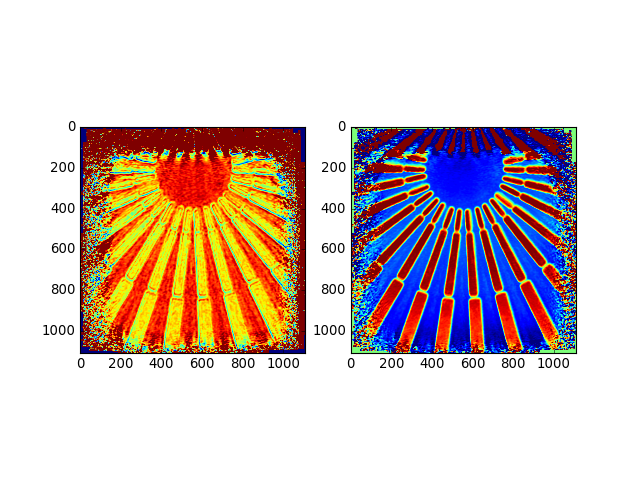

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2)

image = sharpNSLS2.getImage()
ax1.imshow(np.abs(image))
ax2.imshow(np.angle(image))  
f.canvas.draw()

Define a function for processing and monitoring one iteration of the reconstruction algorithm

In [4]:
def make_step(i):
    sharpNSLS2.step()
    image = sharpNSLS2.getImage()
    ax1.imshow(np.abs(image))
    ax2.imshow(np.angle(image))  
    f.canvas.draw()

Run the reconstruction algorithm

In [5]:
t1 = datetime.now();
for i in range(100):
    make_step(i)
t2 = datetime.now()    
print "initialization time: ", (t2 - t1)

initialization time:  0:01:31.938138


Write results of the reconstruction into the cxi file

In [6]:
sharpNSLS2.writeImage()

Show results

In [7]:
f = h5py.File('e1.cxi','r')
f.close()

f = h5py.File('e1.cxi','r')
plt.subplot(1,2,1)
plt.imshow(np.abs(np.array(f['/entry_1/image_1/data'])))
plt.subplot(1,2,2)
plt.imshow(np.angle(np.array(f['/entry_1/image_1/data'])))

In [8]:
plt.subplot(1,2,1)
plt.imshow(np.abs(np.array(f['/entry_1/image_1/process_1/final_illumination'])))
plt.subplot(1,2,2)
plt.imshow(np.angle(np.array(f['/entry_1/image_1/process_1/final_illumination'])))